## Data Cleaning and EDA

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
data = pd.read_csv('../data/train.csv')

In [3]:
data.shape

(2051, 81)

In [4]:
data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# all columns lower case and spaces replaced with underscore
data.columns = data.columns.str.lower().str.replace(' ', '_')

---

### **Selecting the variables that are relevant for our problem**

In [6]:
# looking at the list of features and their missing values
pd.set_option('display.max_rows',100)
data.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

---

#### Numeric features

In [7]:
num_cols = [
    'overall_qual', 'overall_cond', 'year_remod/add', 'exter_qual', 'exter_cond', 'kitchen_qual', 'full_bath',
    'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'wood_deck_sf', 'pool_area',
    'misc_val', 'heating_qc',
 
    # features with missing values
    'bsmt_cond', 'bsmtfin_sf_1', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 
    'fireplace_qu', 'garage_qual', 'garage_cond',
    
    # including also the target variable
    'saleprice'
]

---

##### Checking the **numeric** features <ins>without NA's</ins>

In [8]:
data['overall_qual'].value_counts() # from 1 (worst quality) to 10 (best quality)

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

In [9]:
data['overall_cond'].value_counts() # from 1 (worst condition) to 9 (best condition)

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

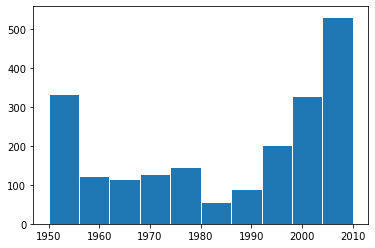

In [10]:
data['year_remod/add'].hist(edgecolor='white', grid=False);

In [11]:
data['exter_qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [12]:
# transforming exter_qual into numeric scale, from 1 (worst) to 5 (best)
qual_dict = {'Ex' : 5,
             'Gd' : 4,
             'TA' : 3,
             'Fa' : 2,
             'Po' : 1}

In [13]:
data['exter_qual'] = data['exter_qual'].map(qual_dict)

In [14]:
data['exter_cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [15]:
# transforming exter_cond into numeric scale, from 1 (worst) to 5 (best)
data['exter_cond'] = data['exter_cond'].map(qual_dict)

In [16]:
data['kitchen_qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64

In [17]:
# transforming kitchen_qual into numeric scale, from 1 (worst) to 5 (best)
data['kitchen_qual'] = data['kitchen_qual'].map(qual_dict)

In [18]:
data['full_bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: full_bath, dtype: int64

In [19]:
data['half_bath'].value_counts()

0    1308
1     725
2      18
Name: half_bath, dtype: int64

In [20]:
data['bedroom_abvgr'].value_counts()

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: bedroom_abvgr, dtype: int64

In [21]:
# there are 5 houses with 0 bedrooms above ground, this might be weird, we'll check it
pd.set_option('display.max_columns', 100)
data[data['bedroom_abvgr']==0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
191,2119,906475170,20,RL,155.0,20064,Pave,NaN,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,8,6,1976,1976,Shed,WdShngl,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,Gd,Gd,Gd,LwQ,51.0,GLQ,915.0,0.0,966.0,GasA,Ex,Y,SBrkr,1743,0,0,1743,2.0,0.0,0,1,0,1,4,5,Typ,2,Fa,Attchd,1976.0,Fin,2.0,529.0,TA,TA,Y,646,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,279000
346,2724,905200490,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,TA,Gd,Av,GLQ,648.0,Unf,0.0,0.0,648.0,GasA,Ex,Y,SBrkr,960,0,0,960,1.0,1.0,0,0,0,1,3,3,Typ,0,NaN,Attchd,1965.0,Unf,1.0,364.0,TA,TA,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,145000
744,1386,905200090,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,Gd,TA,Av,GLQ,1198.0,Unf,0.0,0.0,1198.0,GasA,TA,Y,SBrkr,1258,0,0,1258,2.0,0.0,0,2,0,2,3,6,Typ,0,NaN,CarPort,1969.0,Unf,2.0,400.0,Fa,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,108959
1308,1000,527127140,120,RL,41.0,4923,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,3,PConc,Ex,TA,Av,GLQ,1153.0,Unf,0.0,440.0,1593.0,GasA,Ex,Y,SBrkr,1593,0,0,1593,1.0,0.0,1,1,0,1,5,5,Typ,1,Gd,Attchd,2001.0,Fin,2.0,682.0,TA,TA,Y,0,120,0,0,224,0,NaN,NaN,NaN,0,8,2008,WD,286000
1571,2523,533350050,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,4,3,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842,0,0,1842,2.0,0.0,0,1,0,1,4,5,Typ,1,Gd,Attchd,1981.0,Fin,3.0,894.0,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,385000


In [22]:
# There are 5 houses with 0 bedrooms above ground. Although not impossible, this is perhaps not really plausible,
# since these houses have multiple levels, or more than one story, so that it is strange that there are no bedrooms
# above ground. 
# Moreover, when looking at the value counts of this feature, we see that there are from 1 to 8 bedrooms above 
# ground, but no 7, only 0. So this might be a typo. It also makes sense that this should have been 7, because
# there are fewer homes with a large number of bedrooms.

In [23]:
# to do another check, we'll look at the ms_subcalss and the total square footage for homes with 6 bedrooms above
# ground
data[data['bedroom_abvgr']==6]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
194,670,535402330,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,3,3,CBlock,TA,TA,No,LwQ,500.0,Unf,0.0,748.0,1248.0,GasA,TA,Y,SBrkr,1338,1296,0,2634,1.0,1.0,2,2,6,2,3,12,Typ,0,NaN,Detchd,1969.0,Unf,4.0,968.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,200000
530,900,908275040,90,RL,65.0,10926,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1959,1959,Hip,CompShg,VinylSd,VinylSd,BrkFace,74.0,3,3,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1678.0,1678.0,GasA,TA,Y,SBrkr,1678,0,0,1678,0.0,0.0,2,0,6,2,3,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,119900
534,2487,532351090,90,RM,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,BrkFace,336.0,3,3,CBlock,TA,TA,No,Rec,1332.0,Unf,0.0,396.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,6,2,3,10,Typ,0,NaN,Detchd,1963.0,Unf,2.0,504.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,ConLI,125000
822,1516,909101180,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,2Story,5,6,1912,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,TA,Fa,No,Rec,210.0,Unf,0.0,570.0,780.0,GasA,Ex,N,SBrkr,936,780,0,1716,1.0,0.0,2,0,6,1,2,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,184,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,135900
984,1196,534225110,90,RL,72.0,11072,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1728.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,0.0,0.0,2,0,6,2,3,10,Typ,0,NaN,Detchd,1987.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,145000
1256,813,906226120,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1120,1120,0,2240,0.0,0.0,2,0,6,2,3,12,Typ,0,NaN,Detchd,1979.0,Unf,2.0,528.0,TA,TA,Y,154,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,142953
1366,1968,535457040,90,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,Duplex,1Story,5,4,1961,1961,Gable,CompShg,BrkFace,BrkFace,None,0.0,3,3,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1800.0,1800.0,GasA,Ex,N,SBrkr,1800,0,0,1800,0.0,0.0,2,0,6,2,3,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,141000
1451,1278,535456050,90,RL,113.0,8513,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,Duplex,1Story,5,5,1961,1961,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,3,3,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,1800.0,1800.0,GasA,TA,N,SBrkr,1800,0,0,1800,0.0,0.0,2,0,6,2,3,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,130000
1566,816,906230010,90,RL,NaN,11855,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,3,3,PConc,Ex,TA,No,GLQ,820.0,Unf,0.0,348.0,1168.0,GasA,Ex,Y,SBrkr,1168,1619,0,2787,2.0,0.0,4,2,6,2,3,8,Typ,2,TA,BuiltIn,2000.0,Fin,4.0,820.0,TA,TA,

In [24]:
# we cannot know whether the 5 homes with 0 bedrooms above ground are a mistake or actual data. Since there are
# only 5 of them, we will drop them
data = data[data['bedroom_abvgr']!=0]

In [25]:
data['kitchen_abvgr'].value_counts()

1    1956
2      87
0       2
3       1
Name: kitchen_abvgr, dtype: int64

In [26]:
data['totrms_abvgrd'].value_counts()

6     596
7     475
5     404
8     228
4     146
9      98
10     49
11     22
12     13
3      11
2       1
13      1
14      1
15      1
Name: totrms_abvgrd, dtype: int64

In [27]:
data['fireplaces'].value_counts()

0    998
1    896
2    145
3      6
4      1
Name: fireplaces, dtype: int64

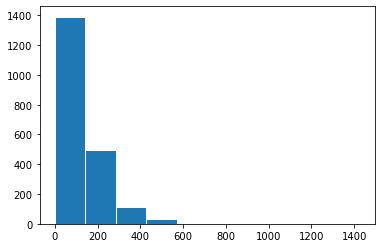

In [28]:
data['wood_deck_sf'].hist(edgecolor='white', grid=False);

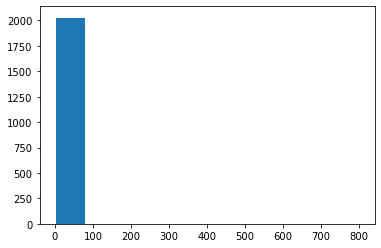

In [29]:
data['pool_area'].hist(edgecolor='white', grid=False);

In [30]:
data['pool_area'].value_counts()

0      2037
228       1
368       1
480       1
519       1
561       1
576       1
648       1
738       1
800       1
Name: pool_area, dtype: int64

In [31]:
# this feature doesn't have very informative data, since in homes with a pool, there is only 1 data points for 
# each size of that pool. We will transform this variable into a categorical variable of 1 (there is a pool) and
# 0 (there is no pool)
# we'll leave the feature's name as it is, so that we can run the code on the Kaggle test data
data['pool_area'] = np.where(data['pool_area']==0, 0, 1)

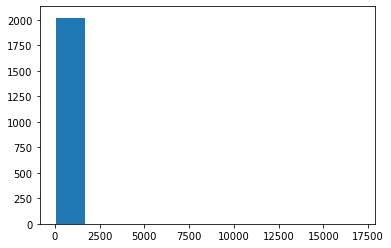

In [32]:
data['misc_val'].hist(edgecolor='white', grid=False);

In [33]:
data['misc_val'].value_counts()

0        1981
400        12
500         8
600         6
450         5
2000        5
700         4
4500        2
2500        2
1200        2
3000        2
6500        1
1500        1
3500        1
1300        1
1150        1
900         1
800         1
650         1
80          1
17000       1
12500       1
54          1
480         1
460         1
455         1
300         1
8300        1
Name: misc_val, dtype: int64

In [34]:
# there are many values with few observations (many with only 1 observation).
# we will transform this variable by creating bigger categories:
data['misc_val'] = [0 if a==0 else 1000 if (a>0 and a<=1000) else 5000 if (a>1000 and a<=5000) else 10000 for a in data['misc_val'] ]

In [35]:
data['misc_val'].value_counts()

0        1981
1000       44
5000       17
10000       4
Name: misc_val, dtype: int64

---

##### Checking the **numeric** features <ins>with NA's</ins>

In [36]:
data['bsmt_cond'].value_counts()

TA    1831
Gd      87
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [37]:
data['bsmt_cond'] = data['bsmt_cond'].map(qual_dict)

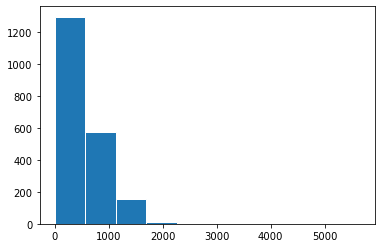

In [38]:
data['bsmtfin_sf_1'].hist(edgecolor='white', grid=False);

In [39]:
data['bsmtfin_sf_1'].sort_values()

1025       0.0
983        0.0
984        0.0
989        0.0
996        0.0
         ...  
685     2158.0
1671    2188.0
1885    4010.0
960     5644.0
1327       NaN
Name: bsmtfin_sf_1, Length: 2046, dtype: float64

In [40]:
# there is only 1 NA in this feature, we will drop it
data.drop(axis=0, index=1327, inplace=True)

In [41]:
data['total_bsmt_sf'].sort_values() # the missing values have been removed already

183        0.0
635        0.0
1222       0.0
2010       0.0
1859       0.0
         ...  
1164    3094.0
328     3200.0
1147    3206.0
1885    5095.0
960     6110.0
Name: total_bsmt_sf, Length: 2045, dtype: float64

In [42]:
data['bsmt_full_bath'].value_counts()

0.0    1200
1.0     822
2.0      20
3.0       2
Name: bsmt_full_bath, dtype: int64

In [43]:
data['bsmt_half_bath'].value_counts()

0.0    1919
1.0     121
2.0       4
Name: bsmt_half_bath, dtype: int64

In [44]:
data['fireplace_qu'].value_counts()

Gd    521
TA    407
Fa     58
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [45]:
data['fireplace_qu'] = data['fireplace_qu'].map(qual_dict)

In [46]:
data['garage_qual'].value_counts()

TA    1827
Fa      81
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [47]:
data['garage_qual'] = data['garage_qual'].map(qual_dict)

In [48]:
data['garage_cond'].value_counts()

TA    1862
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [49]:
data['garage_cond'] = data['garage_cond'].map(qual_dict)

In [50]:
data['heating_qc'].value_counts()

Ex    1062
TA     595
Gd     318
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [51]:
data['heating_qc'] = data['heating_qc'].map(qual_dict)

---

#### Categorical features

In [52]:
cat_cols = [
    'house_style', 'heating', 'central_air', 'electrical', 'paved_drive',
    
    # features with missing values
    'garage_finish', 'fence', 'bsmtfin_type_1'
]

---

##### Checking the **categorical** features <ins>without NA's</ins>

In [53]:
data['house_style'].value_counts()

1Story    1055
2Story     598
1.5Fin     218
SLvl        93
SFoyer      49
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [54]:
style_dict = {'1Story' : 'story_1',
              '2Story' : 'story_2',
              '1.5Fin' : 'story_1_half_fin',
              'SLvl' : 'split_level',
              'SFoyer' : 'split_foyer',
              '2.5Unf' : 'story_2_half_unfin',
              '1.5Unf' : 'story_1_half_unfin',
              '2.5Fin' : 'story_2_half_fin'}

data['house_style'] = data['house_style'].map(style_dict)

In [55]:
data['heating'].value_counts()

GasA    2012
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

In [56]:
data['central_air'].value_counts()

Y    1904
N     141
Name: central_air, dtype: int64

In [57]:
data['electrical'].value_counts()

SBrkr    1863
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [58]:
# drop the category with only 1 observation
data[data['electrical']=='Mix']

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1159,2240,910204090,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,story_1,5,2,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,2,BrkTil,Fa,1.0,No,Unf,0.0,Unf,0.0,961.0,961.0,GasA,4,Y,Mix,1077,0,0,1077,0.0,0.0,1,0,2,1,3,6,Maj2,0,NaN,Detchd,1920.0,Unf,1.0,338.0,1.0,1.0,N,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,67000


In [59]:
data.drop(axis=0, index=1159, inplace=True)

In [60]:
data['paved_drive'].value_counts()

Y    1855
N     150
P      39
Name: paved_drive, dtype: int64

---

##### Checking the **categorical** features <ins>with NA's</ins>

In [61]:
data['garage_finish'].value_counts()

Unf    845
RFn    579
Fin    506
Name: garage_finish, dtype: int64

In [62]:
data['garage_finish'].sort_values()

2050    Fin
1350    Fin
516     Fin
517     Fin
1348    Fin
       ... 
1991    NaN
2010    NaN
2027    NaN
2039    NaN
2042    NaN
Name: garage_finish, Length: 2044, dtype: object

In [63]:
# here NA means 'no garage', so we'll fill them with this value
data['garage_finish'].fillna('no_garage', inplace=True)

In [64]:
data['fence'].value_counts()

MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [65]:
data['fence'].sort_values()

948     GdPrv
292     GdPrv
285     GdPrv
1258    GdPrv
278     GdPrv
        ...  
2046      NaN
2047      NaN
2048      NaN
2049      NaN
2050      NaN
Name: fence, Length: 2044, dtype: object

In [66]:
# NA means 'no fence'
data['fence'].fillna('no_fence', inplace=True)

In [67]:
data['bsmtfin_type_1'].sort_values()

1297    ALQ
1248    ALQ
683     ALQ
1675    ALQ
335     ALQ
       ... 
1859    NaN
1875    NaN
1889    NaN
1933    NaN
2010    NaN
Name: bsmtfin_type_1, Length: 2044, dtype: object

In [68]:
# filling NA's with 0 - meaning 'no basement'
data['bsmtfin_type_1'].fillna('no_basement', inplace=True)
data['bsmtfin_type_1'].value_counts()

GLQ            611
Unf            602
ALQ            293
BLQ            200
Rec            183
LwQ            101
no_basement     54
Name: bsmtfin_type_1, dtype: int64

---

#### Selecting only relevant columns

In [69]:
data = data[num_cols + cat_cols]

In [70]:
data.shape

(2044, 33)

---

### **Save the data**

In [71]:
data.to_csv('../data/data2.csv', index=False)

---